In [23]:
import numpy as np
import matplotlib.pyplot as plt

from functionsN import init_alphas
from functionsN import train_test_index_split
from functionsN import train_test_basic
from functionsN import cross_val
from functionsN import find_best_val

In [22]:
#Create dot product kernel matrix:

# poly_mat = np.einsum('ij,kj->ik', data[:,1:], data[:,1:])

# np.save('results/poly_mat.npy', poly_mat)

In [ ]:
#Create Gaussian kernel matrix:

# points = data[:,1:]
# distances = np.sum((points[:, np.newaxis] - points) ** 2, axis=-1)
# gauss_mat = np.exp(-distances)

# np.save('results/gauss_mat.npy', gauss_mat)

In [2]:
data = np.loadtxt(('zipcombo.dat'))
poly_mat = np.load('results/poly_mat.npy')
gauss_mat = np.load('results/gauss_mat.npy')

data_idx = np.arange(len(data))

1. Basic results for the polynomial kernel

In [3]:
#results stored: dim1=d, dim2=run, dim3=train/test
results = np.zeros((7,20,2))

for d in range(7):
    for i in range(20):
        train_idx, test_idx = train_test_index_split(data_idx)
        r_train, r_test = train_test_basic(train_idx, test_idx, poly_mat, d+1)
        print(f'Calculating run {i+1} for power {d+1}.')
        results[d,i,0], results[d,i,1] = r_train['error_rate'], r_test['error_rate'] 

np.save('resultsN/basic_poly_results.npy', results)

Calculating run 1 for power 1.
Calculating run 2 for power 1.
Calculating run 3 for power 1.
Calculating run 4 for power 1.
Calculating run 5 for power 1.
Calculating run 6 for power 1.
Calculating run 7 for power 1.
Calculating run 8 for power 1.
Calculating run 9 for power 1.
Calculating run 10 for power 1.
Calculating run 11 for power 1.
Calculating run 12 for power 1.
Calculating run 13 for power 1.
Calculating run 14 for power 1.
Calculating run 15 for power 1.
Calculating run 16 for power 1.
Calculating run 17 for power 1.
Calculating run 18 for power 1.
Calculating run 19 for power 1.
Calculating run 20 for power 1.
Calculating run 1 for power 2.
Calculating run 2 for power 2.
Calculating run 3 for power 2.
Calculating run 4 for power 2.
Calculating run 5 for power 2.
Calculating run 6 for power 2.
Calculating run 7 for power 2.
Calculating run 8 for power 2.
Calculating run 9 for power 2.
Calculating run 10 for power 2.
Calculating run 11 for power 2.
Calculating run 12 for pow

In [16]:
basic_poly_results_loaded = np.load('resultsN/basic_poly_results.npy')

In [17]:
means = np.mean(basic_poly_results_loaded, axis = 1)
stds = np.std(basic_poly_results_loaded, axis=1)

2. Cross-validation, 3. Confusion matrix

In [4]:
candidates = [1,2,3,4,5,6,7]

d_star_list = np.zeros(20)
test_error_list = np.zeros(20)
conf_mat_list = np.zeros((20,10,10))
incorrect_pred_idx = np.zeros(len(data))

CV_mistakes_idx = data_idx.copy()
        
for i in range(20):
    print(f'Run {i+1}')
    d_star, r_train, r_test = find_best_val(data_idx, poly_mat, candidates)
    d_star_list[i] = d_star
    test_error_list[i] = r_test['error_rate']
    conf_mat_list[i,:,:] = r_test['conf_mat']
    incorrect_pred_idx += r_test['mistakes_idx']

np.save('resultsN/poly_best_vals.npy', d_star_list)
np.save('resultsN/poly_cv_errors.npy', test_error_list)
np.save('resultsN/poly_conf_mats.npy', conf_mat_list)
np.save('resultsN/poly_wrong_preds.npy', incorrect_pred_idx)

Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20


In [14]:
d_star_list_loaded = np.load('resultsN/poly_best_vals.npy')
test_error_list_loaded = np.load('resultsN/poly_cv_errors.npy')
conf_mat_list_loaded = np.load('resultsN/poly_conf_mats.npy')

In [10]:
test_error_mean = np.mean(test_error_list_loaded)
test_error_std = np.std(test_error_list_loaded)

In [19]:
conf_mat_mean = np.mean(conf_mat_list_loaded, axis=0)
conf_mat_std = np.std(conf_mat_list_loaded, axis=0)

In [21]:
conf_mat_std

array([[0.        , 0.00134136, 0.0028993 , 0.0021518 , 0.00156114,
        0.00295392, 0.0027109 , 0.00129596, 0.00117737, 0.00137602],
       [0.        , 0.        , 0.0015973 , 0.00088957, 0.00414789,
        0.00086486, 0.00267791, 0.00226906, 0.00234563, 0.00181621],
       [0.00422852, 0.00398196, 0.        , 0.00507499, 0.00588298,
        0.00350299, 0.00357414, 0.00528413, 0.00502233, 0.00102322],
       [0.00446946, 0.00312971, 0.00474238, 0.        , 0.00280204,
        0.00881538, 0.00241557, 0.00495264, 0.0058712 , 0.00248306],
       [0.00172423, 0.00440213, 0.00527108, 0.00203723, 0.        ,
        0.00286482, 0.00638395, 0.00431327, 0.0020421 , 0.00655704],
       [0.00701381, 0.00253409, 0.0033022 , 0.00908472, 0.00513551,
        0.        , 0.00583155, 0.00343576, 0.00534192, 0.00397128],
       [0.0071712 , 0.00352545, 0.00352134, 0.        , 0.00471255,
        0.00477796, 0.        , 0.00311917, 0.0047017 , 0.        ],
       [0.00226674, 0.00611386, 0.0069539

4. Hardest to predict images

In [27]:
# set up a toy run to see which images are hardest to predict
#need to account for how many times they were tested

def count_mistakes(n):
    
    incorrect_pred_idx = np.zeros(len(data))

    for i in range(n):
        print(f'round {i+1}')
        for dd in range(5,8):
            print(f'd: {dd}')
            #use cross-validating split to ensure every data point gets tested the same # of times
            train_idx, test_idx = train_test_index_split(data_idx, CV=True)
            for k in range(5):
                r_train, r_test = train_test_basic(train_idx[k], test_idx[k], poly_mat, dd, keep_mistakes=True)
                incorrect_pred_idx += r_test['mistakes_idx']
            
    num_tests = n*3
    return incorrect_pred_idx, num_tests

wrong_preds = count_mistakes(10)

np.save('resultsN/wrong_pics.npy', wrong_preds[0])


round 1
d: 5
d: 6
d: 7
round 2
d: 5
d: 6
d: 7
round 3
d: 5
d: 6
d: 7
round 4
d: 5
d: 6
d: 7
round 5
d: 5
d: 6
d: 7
round 6
d: 5
d: 6
d: 7
round 7
d: 5
d: 6
d: 7
round 8
d: 5
d: 6
d: 7
round 9
d: 5
d: 6
d: 7
round 10
d: 5
d: 6
d: 7


[8333  226  111   99   70   44   28   38   30   15   14   14   12   23
   12   17    8   15    9   16   14   10   10   13    6    8    5   14
   18   20   46]


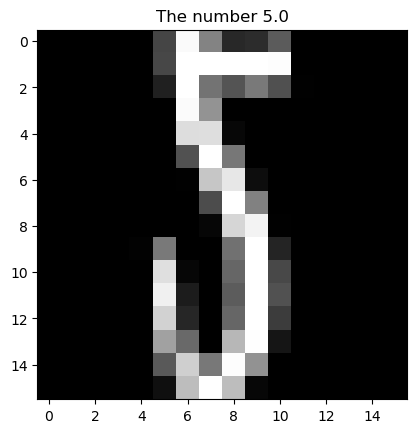

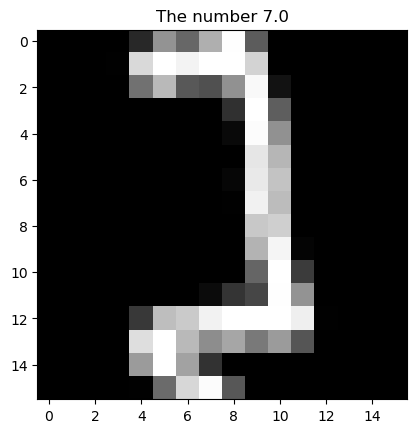

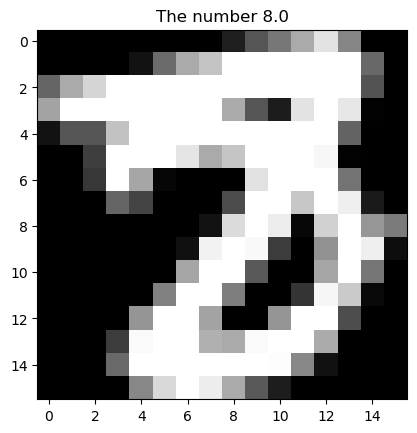

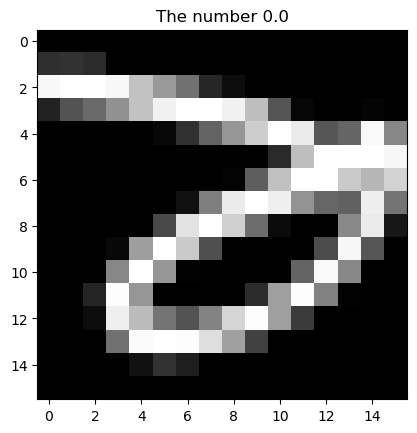

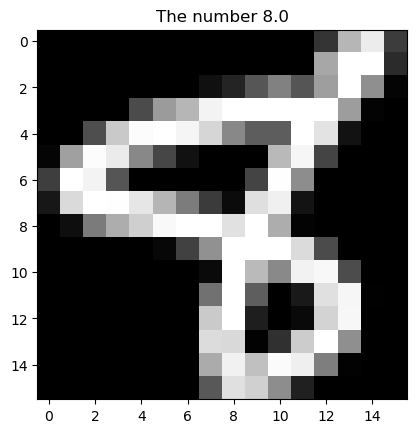

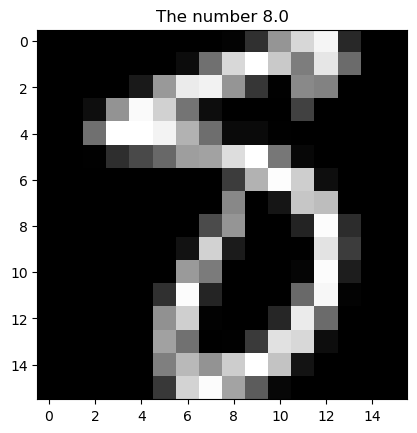

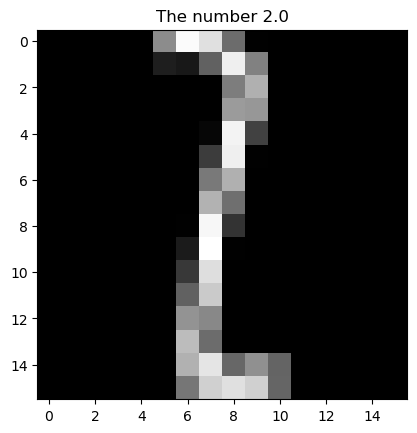

In [29]:
wrong_pred_counts_loaded = np.load('resultsN/wrong_pics.npy')

print(np.bincount(wrong_pred_counts_loaded.astype(int)))

hardest_to_predict = np.argsort(-wrong_pred_counts_loaded)

def plot_char(char):
    label = char[0]
    pixels = np.array(char[1:257]).reshape(16, 16)
    
    # Plotting
    plt.imshow(pixels, cmap='gray')
    plt.title(f"The number {label}")
    plt.show()

for i in hardest_to_predict[:7]:
    plot_char(data[i,:])

5. Gaussian Kernel

In [ ]:
initial_candidates = [-2,-1,-0.5,-0.1,0.001,0.005,0.01,0.025,0.50,0.075,0.1,0.15,0.2,0.3,0.5,1,2]

errors = {c: None for c in initial_candidates}

for c in initial_candidates:
    train_idx, test_idx = train_test_index_split(data_idx)
    r_train, r_test = train_test_basic(train_idx, test_idx, gauss_mat, c)
    errors[c] = r_test['error_rate']

np.save('resultsN/gauss_init_errors.npy', errors)

Questions 1 and 2 with the Gaussian kernel   

In [5]:
#Question 1:
results = np.zeros((7,20,2))
candidates = [0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]

for j,c in enumerate(candidates):
    for i in range(20):
        print(f'Calculating run {i+1} for candidate {j+1}.')
        train_idx, test_idx = train_test_index_split(data_idx)
        r_train, r_test = train_test_basic(train_idx, test_idx, gauss_mat, c)
        results[j,i,0], results[j,i,1] = r_train['error_rate'], r_test['error_rate'] 

np.save('resultsN/basic_gauss_results.npy', results)

Calculating run 1 for candidate 1.
Calculating run 2 for candidate 1.
Calculating run 3 for candidate 1.


KeyboardInterrupt: 

In [ ]:
basic_gauss_results_loaded = np.load('resultsN/basic_gauss_results.npy')

means = np.mean(basic_gauss_results_loaded, axis = 1)
stds = np.std(basic_gauss_results_loaded, axis=1)

In [ ]:
#Question 2:

candidates = [0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]

c_star_list = np.zeros(20)
test_error_list = np.zeros(20)
        
for i in range(20):
    print(f'Run {i+1}')
    c_star, r_train, r_test = find_best_val(data_idx, poly_mat, candidates, calc_conf=False, keep_mistakes=False)
    c_star_list[i] = c_star
    test_error_list[i] = r_test['error_rate']

np.save('resultsN/gauss_best_vals.npy', c_star_list)
np.save('resultsN/gauss_cv_errors.npy', test_error_list)